In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import copy

In [2]:
data = pd.read_csv('Iris.csv')

In [3]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df = copy.deepcopy(data)
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [6]:
df.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [7]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Id,150.0,NaN,NaN,NaN,75.5,43.445368,1.0,38.25,75.5,112.75,150.0
SepalLengthCm,150.0,NaN,NaN,NaN,5.843333,0.828066,4.3,5.1,5.8,6.4,7.9
SepalWidthCm,150.0,NaN,NaN,NaN,3.054,0.433594,2.0,2.8,3.0,3.3,4.4
PetalLengthCm,150.0,NaN,NaN,NaN,3.758667,1.76442,1.0,1.6,4.35,5.1,6.9
PetalWidthCm,150.0,NaN,NaN,NaN,1.198667,0.763161,0.1,0.3,1.3,1.8,2.5
Species,150,3,Iris-setosa,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df.nunique()

Id               150
SepalLengthCm     35
SepalWidthCm      23
PetalLengthCm     43
PetalWidthCm      22
Species            3
dtype: int64

C:\Users\mirhu\AppData\Local\Temp\ipykernel_23332\3341059058.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mask = np.triu(np.ones_like(df.corr(), dtype=np.bool_))
C:\Users\mirhu\AppData\Local\Temp\ipykernel_23332\3341059058.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heatmap = sns.heatmap(df.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')


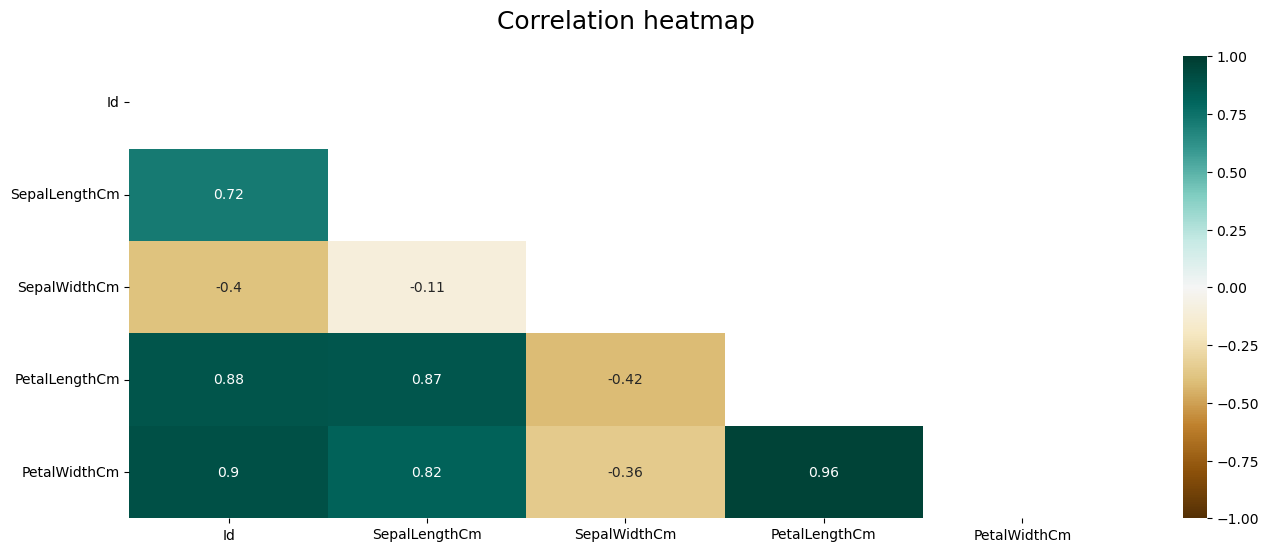

In [9]:
plt.figure(figsize=(16, 6))
mask = np.triu(np.ones_like(df.corr(), dtype=np.bool_))
heatmap = sns.heatmap(df.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation heatmap', fontdict={'fontsize':18}, pad=20)
plt.show()

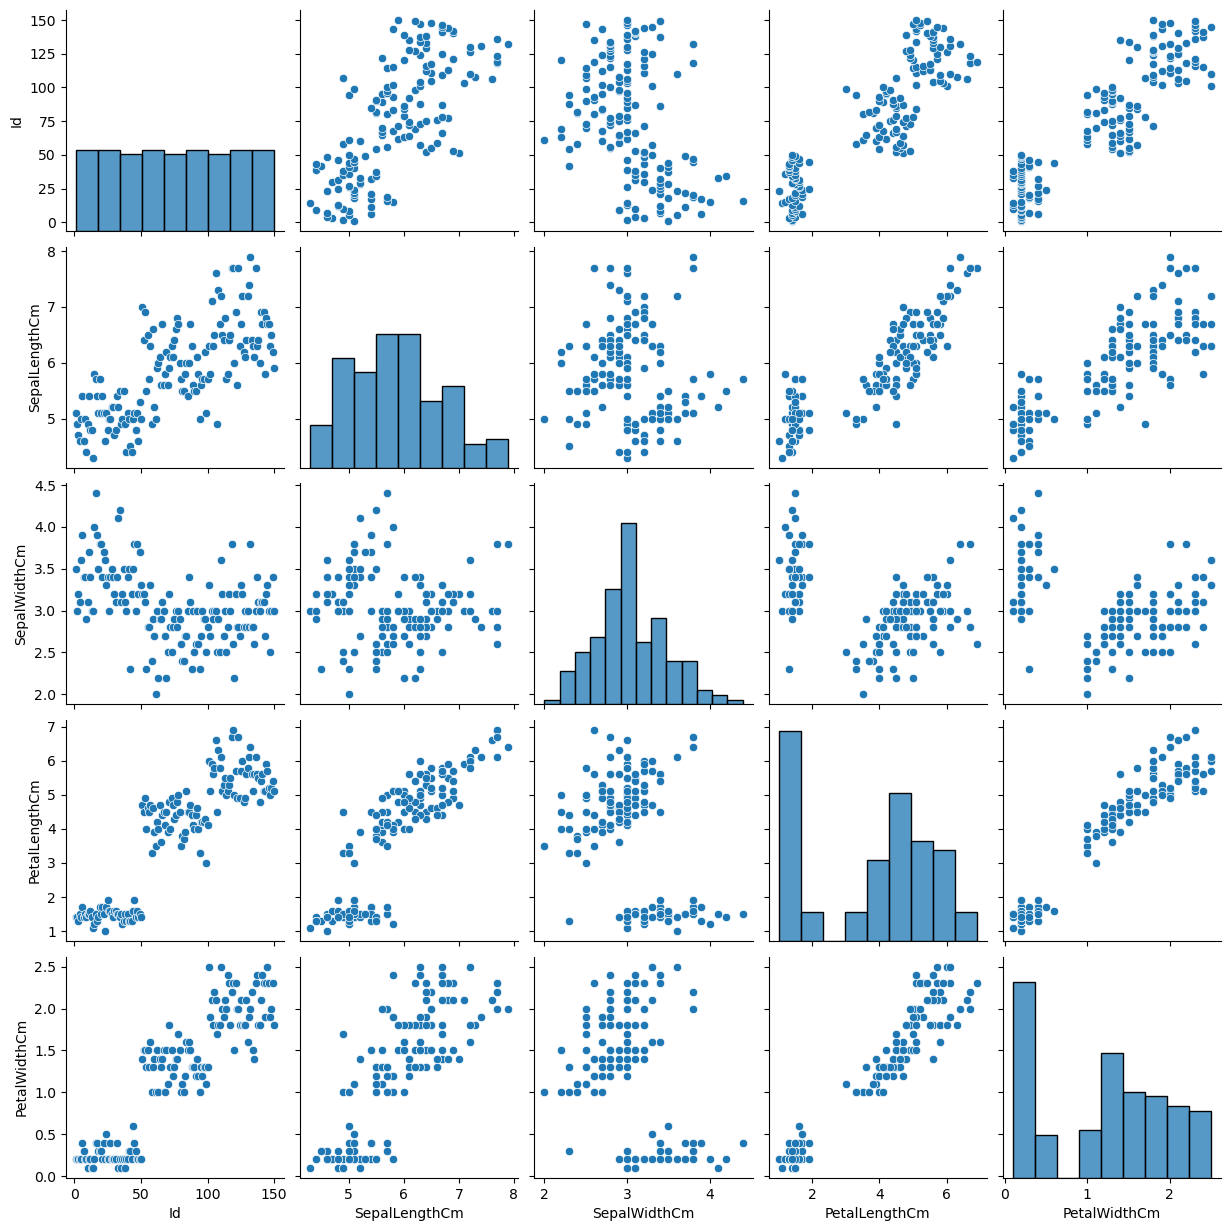

In [10]:
sns.pairplot(df)
plt.show()

In [11]:
df.set_index('Id' , inplace=True)
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
146,6.7,3.0,5.2,2.3,Iris-virginica
147,6.3,2.5,5.0,1.9,Iris-virginica
148,6.5,3.0,5.2,2.0,Iris-virginica


In [13]:
df = df.drop('Species', axis = 1)

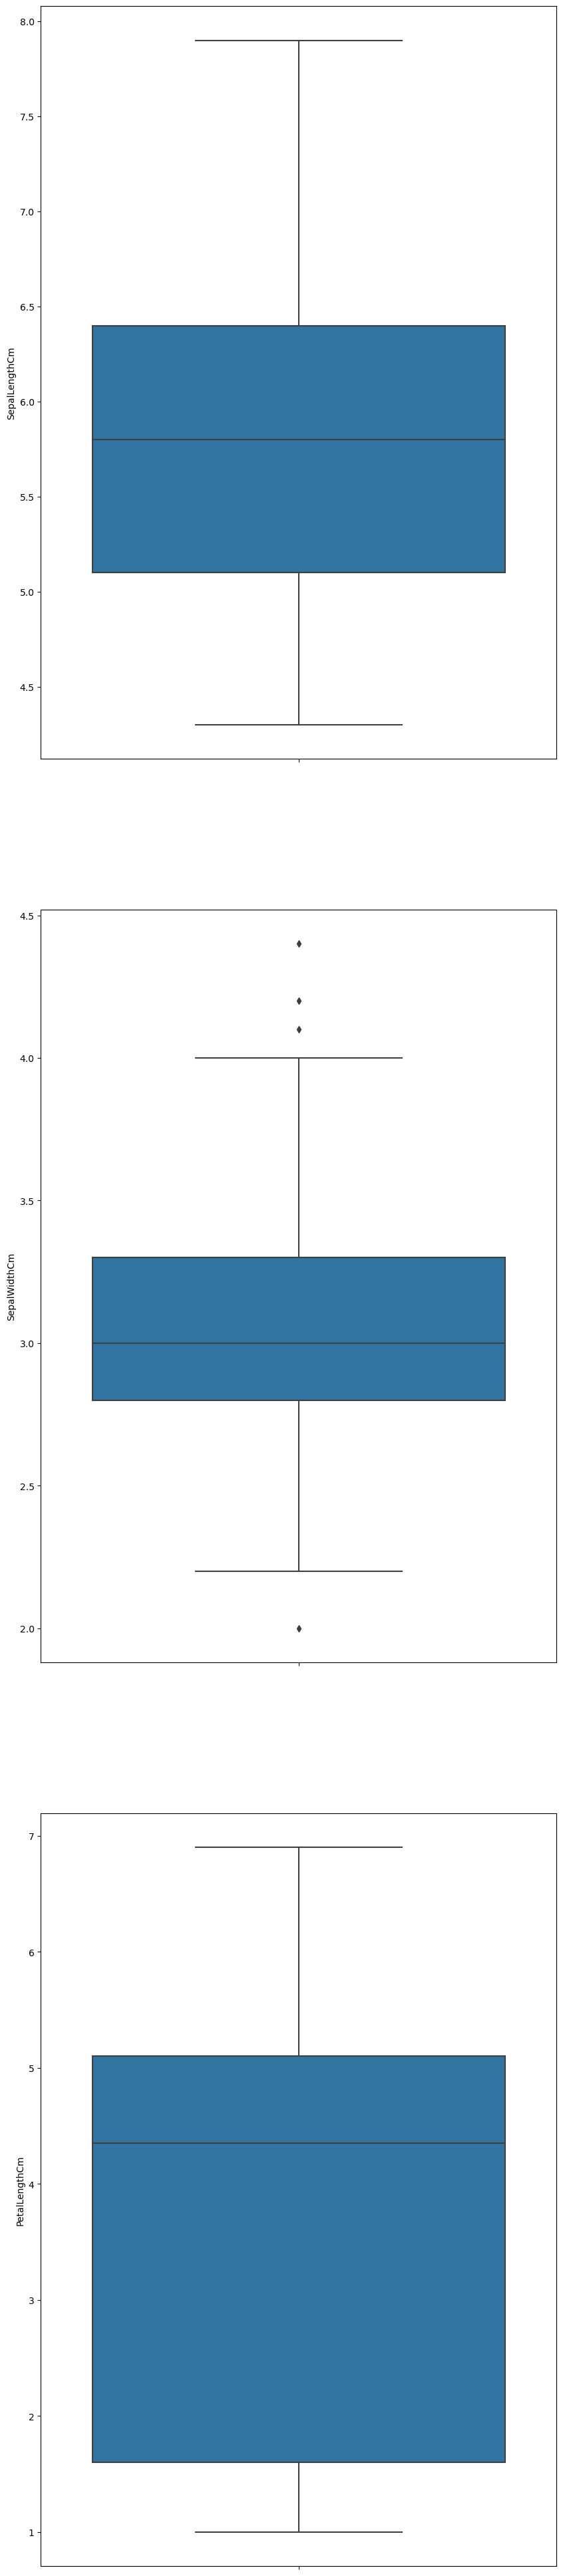

In [14]:
fig, axes = plt.subplots(nrows=len(df.columns)-1, figsize=(10,50))
for i in range(len(df.columns)-1):
    sns.boxplot(ax=axes[i], y=df.columns[i], data=df)

In [15]:
def boxplot_clip(col):
    q1 = df.loc[:, col].quantile(0.25)
    q3 = df.loc[:, col].quantile(0.75)
    iqr = q3 -  q1
    upperbound = q3 + 1.5*iqr
    lowerbound = q1 - 1.5*iqr
    df[col] = df[col].clip(lowerbound,upperbound)

In [16]:
for i in df.columns:
    boxplot_clip(i)

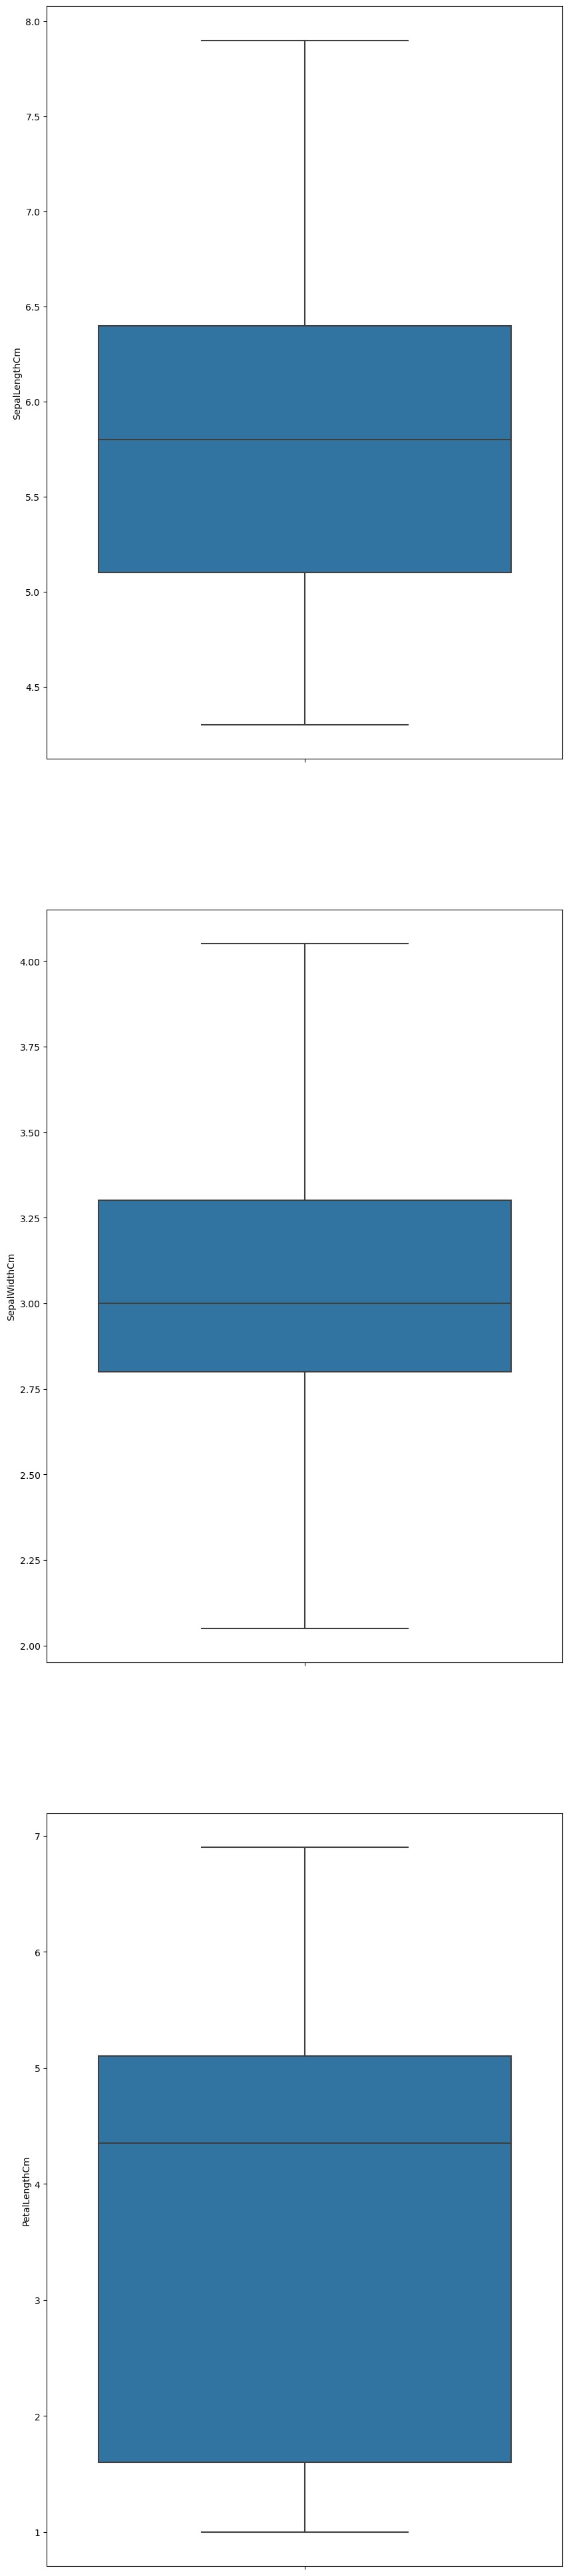

In [17]:
fig, axes = plt.subplots(nrows=len(df.columns)-1, figsize=(10,50))
for i in range(len(df.columns)-1):
    sns.boxplot(ax=axes[i], y=df.columns[i], data=df)

In [18]:
df_ = copy.deepcopy(df)

In [20]:
from sklearn.cluster import KMeans
k_means = KMeans(n_clusters=3, random_state=0)
k_means.fit(df)

C:\Users\mirhu\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\mirhu\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3, random_state=0)

In [21]:
k_means.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [22]:
df_final = copy.deepcopy(data)

In [23]:
df_final.set_index('Id', inplace=True)
df_final['k_means_cluster'] = k_means.labels_
df_final.head(15)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,k_means_cluster
Id,,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa,1
2,4.9,3.0,1.4,0.2,Iris-setosa,1
3,4.7,3.2,1.3,0.2,Iris-setosa,1
4,4.6,3.1,1.5,0.2,Iris-setosa,1
5,5.0,3.6,1.4,0.2,Iris-setosa,1
6,5.4,3.9,1.7,0.4,Iris-setosa,1
7,4.6,3.4,1.4,0.3,Iris-setosa,1
8,5.0,3.4,1.5,0.2,Iris-setosa,1
9,4.4,2.9,1.4,0.2,Iris-setosa,1


In [24]:
df_final[df_final['k_means_cluster']==0].head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,k_means_cluster
Id,,,,,,
51,7.0,3.2,4.7,1.4,Iris-versicolor,0
52,6.4,3.2,4.5,1.5,Iris-versicolor,0
54,5.5,2.3,4.0,1.3,Iris-versicolor,0
55,6.5,2.8,4.6,1.5,Iris-versicolor,0
56,5.7,2.8,4.5,1.3,Iris-versicolor,0


In [25]:
df_final[df_final['k_means_cluster']==1].head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,k_means_cluster
Id,,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa,1
2,4.9,3.0,1.4,0.2,Iris-setosa,1
3,4.7,3.2,1.3,0.2,Iris-setosa,1
4,4.6,3.1,1.5,0.2,Iris-setosa,1
5,5.0,3.6,1.4,0.2,Iris-setosa,1


In [26]:
df_final[df_final['k_means_cluster']==2].head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,k_means_cluster
Id,,,,,,
53,6.9,3.1,4.9,1.5,Iris-versicolor,2
78,6.7,3.0,5.0,1.7,Iris-versicolor,2
101,6.3,3.3,6.0,2.5,Iris-virginica,2
103,7.1,3.0,5.9,2.1,Iris-virginica,2
104,6.3,2.9,5.6,1.8,Iris-virginica,2


In [27]:
df_final.k_means_cluster.replace(to_replace={0:'Iris-versicolor',
                                              1:'Iris-setosa',
                                              2:'Iris-virginica'},
                                              inplace=True)

In [28]:
df_final.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,k_means_cluster
Id,,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa,Iris-setosa


In [29]:
df_final.k_means_cluster.value_counts()

Iris-versicolor    62
Iris-setosa        50
Iris-virginica     38
Name: k_means_cluster, dtype: int64

In [30]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=3, metric='euclidean' , linkage='ward')
hc_clusters = hc.fit_predict(df)

In [31]:
hc_clusters

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int64)

In [32]:
df_final['hc_cluster'] = hc_clusters

In [33]:
df_final[df_final['hc_cluster']==0].head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,k_means_cluster,hc_cluster
Id,,,,,,,
51,7.0,3.2,4.7,1.4,Iris-versicolor,Iris-versicolor,0
52,6.4,3.2,4.5,1.5,Iris-versicolor,Iris-versicolor,0
53,6.9,3.1,4.9,1.5,Iris-versicolor,Iris-virginica,0
54,5.5,2.3,4.0,1.3,Iris-versicolor,Iris-versicolor,0
55,6.5,2.8,4.6,1.5,Iris-versicolor,Iris-versicolor,0


In [34]:
df_final[df_final['hc_cluster']==1].head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,k_means_cluster,hc_cluster
Id,,,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa,Iris-setosa,1
2,4.9,3.0,1.4,0.2,Iris-setosa,Iris-setosa,1
3,4.7,3.2,1.3,0.2,Iris-setosa,Iris-setosa,1
4,4.6,3.1,1.5,0.2,Iris-setosa,Iris-setosa,1
5,5.0,3.6,1.4,0.2,Iris-setosa,Iris-setosa,1


In [35]:
df_final[df_final['hc_cluster']==2].head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,k_means_cluster,hc_cluster
Id,,,,,,,
78,6.7,3.0,5.0,1.7,Iris-versicolor,Iris-virginica,2
101,6.3,3.3,6.0,2.5,Iris-virginica,Iris-virginica,2
103,7.1,3.0,5.9,2.1,Iris-virginica,Iris-virginica,2
104,6.3,2.9,5.6,1.8,Iris-virginica,Iris-virginica,2
105,6.5,3.0,5.8,2.2,Iris-virginica,Iris-virginica,2


In [44]:
df_final.hc_cluster.replace(to_replace={0:'Iris-versicolor',
                                              1:'Iris-setosa',
                                              2:'Iris-virginica'},
                                              inplace=True)

In [45]:
df_final[df_final['k_means_cluster'] != df_final['hc_cluster']]

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,k_means_cluster,hc_cluster
Id,,,,,,,
53,6.9,3.1,4.9,1.5,Iris-versicolor,Iris-virginica,Iris-versicolor
135,6.1,2.6,5.6,1.4,Iris-virginica,Iris-virginica,Iris-versicolor


In [46]:
df_final['k_means_cluster'].value_counts()

Iris-versicolor    62
Iris-setosa        50
Iris-virginica     38
Name: k_means_cluster, dtype: int64

In [47]:
df_final['hc_cluster'].value_counts()

Iris-versicolor    64
Iris-setosa        50
Iris-virginica     36
Name: hc_cluster, dtype: int64

In [48]:
import plotly.express as px

bar_fig = px.bar(df_final, x=df_final['k_means_cluster'].value_counts().index, y=df_final['k_means_cluster'].value_counts().values, 
                  color=df_final['k_means_cluster'].value_counts().index, title='KMeans Cluster Distribution')
bar_fig.update_xaxes(title='Cluster')
bar_fig.update_yaxes(title='Count')
bar_fig.show()

In [49]:
import plotly.express as px
import plotly.graph_objects as go

pie_data = df_final['k_means_cluster'].value_counts()
pie_labels = pie_data.index
pie_values = pie_data.values

pie_fig = go.Figure(data=[go.Pie(labels=pie_labels, values=pie_values)])
pie_fig.update_traces(textinfo='percent+label', hole=0.4)
pie_fig.update_layout(title='KMeans Cluster Distribution')
pie_fig.show()

In [50]:
bar_fig = px.bar(df_final, x=df_final['hc_cluster'].value_counts().index, y=df_final['hc_cluster'].value_counts().values, 
                  color=df_final['hc_cluster'].value_counts().index, title='Hierarchical Agglomerative Clustering Distribution')
bar_fig.update_xaxes(title='Cluster')
bar_fig.update_yaxes(title='Count')
bar_fig.show()

In [51]:
pie_data = df_final['hc_cluster'].value_counts()
pie_labels = pie_data.index
pie_values = pie_data.values

pie_fig = go.Figure(data=[go.Pie(labels=pie_labels, values=pie_values)])
pie_fig.update_traces(textinfo='percent+label', hole=0.4)
pie_fig.update_layout(title='Hierarchical Agglomerative Clustering Distribution')
pie_fig.show()